## PREDICTION USING UNSUPERVIZED ML ##

**In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied by using a simple linear regression**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualization###

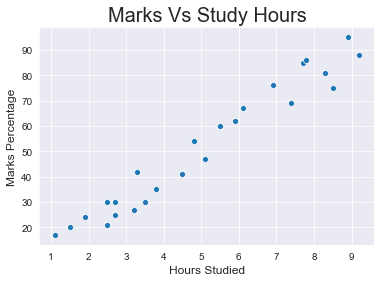

In [3]:
# Marks vs Study Hours

sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Study'**

## Train_Test_split ##

In [13]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

**Training the simple Linear Regression model on the training set**

In [14]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


**PLOTTING THE REGESSION LINE**

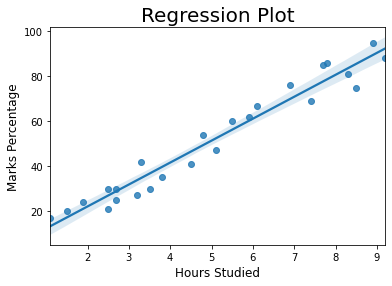

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [4]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**PREDICTING THE TEST RESULTS**

In [8]:
pred_y = regression.predict(test_X)
print(pred_y)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [9]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


 **PLOTTING THE ACTUAL VS PREDICTED DATA**

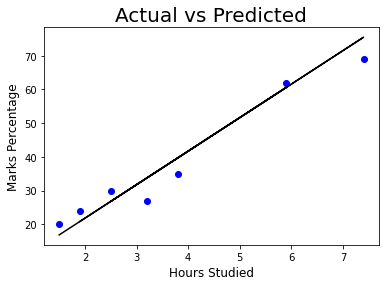

In [10]:
plt.scatter(x=test_X, y=test_y, color='blue')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Calculating Accuracy of the model**

In [11]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('The R-square of the model is:',r2_score(test_y,pred_y))

Mean absolute error:  4.130879918502482
The R-square of the model is: 0.9367661043365056


**Predicting the Score**

In [12]:

# Predicting the score

hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks**